![img](https://www.innomatics.in/wp-content/uploads/2020/04/innomatics-research-labs-logo-squared.png) 

<center> <h1 style='color:blue;'>Innomatics Research Labs January 2024 Internship </h1> </center>

# Name: Mohammad Wasiq

## Intern ID: IN1240273

## E-mail: gl0427@myamu.ac.in

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [43]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/irl/webs/data.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/irl/webs/data_1.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/irl/webs/data_2.csv')


In [ ]:

df_1.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [ ]:
df_2.columns

Index(['Reviewer_Name', 'Reviewer_Rating', 'Review_Title', 'Review_Text',
       'Place_of_Review', 'Date_of_Review', 'Up_Votes', 'Down_Votes'],
      dtype='object')

In [ ]:
df_3.columns

Index(['reviewer_name', 'reviewer_rating', 'review_title', 'review_text',
       'place_of_review', 'Date_of_review', 'up_votes', 'Down_votes'],
      dtype='object')

In [45]:
rename = {'Reviewer Name': 'reviewer_name',
          'Review Title':'review_title',
          'Place of Review':'place_of_review',
          'Up Votes':'up_votes',
          'Down Votes': 'down_votes',
          'Review text':'review_text',
          'Month':'month',
          'Ratings': 'ratings'
          }

In [46]:
df_1 = df_1.rename(columns= rename)

In [47]:
df_1.columns

Index(['reviewer_name', 'review_title', 'place_of_review', 'up_votes',
       'down_votes', 'month', 'review_text', 'ratings'],
      dtype='object')

In [48]:
rename ={'Reviewer_Name':'reviewer_name',
         'Reviewer_Rating':'ratings',
         'Review_Title': "review_title",
         'Review_Text': 'review_text',
         'Place_of_Review':'place_of_review',
         'Date_of_Review':'date_of_review',
         'Up_Votes':'up_votes',
         'Down_Votes': 'down_votes'}

In [49]:
df_2 = df_2.rename(columns= rename)

In [50]:
rename ={'Date_of_review':'date_of_review',
         'Down_votes': 'down_votes',
         'reviewer_rating':'ratings'}

In [51]:
df_3 = df_3.rename(columns= rename)

In [52]:
columns_to_drop = ['month']
df_1.drop(columns=columns_to_drop, inplace=True)



columns_to_drop = ['date_of_review']

# Drop columns from DataFrame
df_2.drop(columns=columns_to_drop, inplace=True)
df_3.drop(columns=columns_to_drop, inplace=True)

In [53]:
print('df_1:', df_1.columns )
print('df_2:', df_2.columns )
print('df_3:', df_3.columns )

df_1: Index(['reviewer_name', 'review_title', 'place_of_review', 'up_votes',
       'down_votes', 'review_text', 'ratings'],
      dtype='object')
df_2: Index(['reviewer_name', 'ratings', 'review_title', 'review_text',
       'place_of_review', 'up_votes', 'down_votes'],
      dtype='object')
df_3: Index(['reviewer_name', 'ratings', 'review_title', 'review_text',
       'place_of_review', 'up_votes', 'down_votes'],
      dtype='object')


In [54]:
merge_df = pd.concat([df_1, df_2, df_3], ignore_index =  True)

In [55]:
merge_df

,reviewer_name,review_title,place_of_review,up_votes,down_votes,review_text,ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,"Nice product, good quality, but price is now r...",4.0
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,They didn't supplied Yonex Mavis 350. Outside ...,1.0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Worst product. Damaged shuttlecocks packed in ...,1.0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,"Quite O. K. , but nowadays the quality of the...",3.0
4,ASHIK P A,Over priced,NaN,147.0,24.0,Over pricedJust â?¹620 ..from retailer.I didn'...,1.0
...,...,...,...,...,...,...,...
20214,Omm Prakash,Simply awesome,"Certified Buyer, Dhamanagar",26.0,5.0,Nice for red tea.Valeu for moneyREAD MORE,5.0
20215,Ritu Raj,Good choice,"Certified Buyer, Katihar District",19.0,4.0,niceREAD MORE,4.0
20216,Arun Saini,Terrible product,"Certified Buyer, Haridwar",13.0,2.0,Tata Gold Vs Tata Tea Premium👍Tata Tea Premiu...,1.0
20217,Amitabh Shahi,Just wow!,"Certified Buyer, Darbhanga",32.0,10.0,I believe that it's the best packaged tea in t...,5.0


In [56]:
merge_df.dropna()

,reviewer_name,review_title,place_of_review,up_votes,down_votes,review_text,ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,"Nice product, good quality, but price is now r...",4.0
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,They didn't supplied Yonex Mavis 350. Outside ...,1.0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Worst product. Damaged shuttlecocks packed in ...,1.0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,"Quite O. K. , but nowadays the quality of the...",3.0
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Good quality product. Delivered on time.READ MORE,5.0
...,...,...,...,...,...,...,...
20214,Omm Prakash,Simply awesome,"Certified Buyer, Dhamanagar",26.0,5.0,Nice for red tea.Valeu for moneyREAD MORE,5.0
20215,Ritu Raj,Good choice,"Certified Buyer, Katihar District",19.0,4.0,niceREAD MORE,4.0
20216,Arun Saini,Terrible product,"Certified Buyer, Haridwar",13.0,2.0,Tata Gold Vs Tata Tea Premium👍Tata Tea Premiu...,1.0
20217,Amitabh Shahi,Just wow!,"Certified Buyer, Darbhanga",32.0,10.0,I believe that it's the best packaged tea in t...,5.0


In [57]:
merge_df.columns

Index(['reviewer_name', 'review_title', 'place_of_review', 'up_votes',
       'down_votes', 'review_text', 'ratings'],
      dtype='object')

In [58]:
df=merge_df

In [59]:
df.head()

,reviewer_name,review_title,place_of_review,up_votes,down_votes,review_text,ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,"Nice product, good quality, but price is now r...",4.0
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,They didn't supplied Yonex Mavis 350. Outside ...,1.0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Worst product. Damaged shuttlecocks packed in ...,1.0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,"Quite O. K. , but nowadays the quality of the...",3.0
4,ASHIK P A,Over priced,NaN,147.0,24.0,Over pricedJust â?¹620 ..from retailer.I didn'...,1.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20219 entries, 0 to 20218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviewer_name    20209 non-null  object 
 1   review_title     20209 non-null  object 
 2   place_of_review  20169 non-null  object 
 3   up_votes         20209 non-null  float64
 4   down_votes       20209 non-null  float64
 5   review_text      20211 non-null  object 
 6   ratings          19973 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.1+ MB


In [61]:
features_avg_rating   = df.groupby(['review_title', 'place_of_review'])['ratings'].mean().reset_index()

In [62]:
df['review_text'] = df['review_text'].fillna('')

# Join the review texts
positive_reviews_text = ' '.join(df[df['ratings'] > 3]['review_text'].astype(str))

# Now proceed with tokenization and word frequency calculation
positive_tokens = word_tokenize(positive_reviews_text)
positive_word_freq = Counter(positive_tokens)

In [63]:
positive_reviews_text = ' '.join(df[df['ratings'] > 3]['review_text'])
positive_tokens = word_tokenize(positive_reviews_text)
positive_word_freq = Counter(positive_tokens)

In [64]:
negative_reviews_text = ' '.join(df[df['ratings'] <= 3]['review_text'])
negative_tokens = word_tokenize(negative_reviews_text)
negative_word_freq = Counter(negative_tokens)

<ipython-input-65-0cfadca57274>:13: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


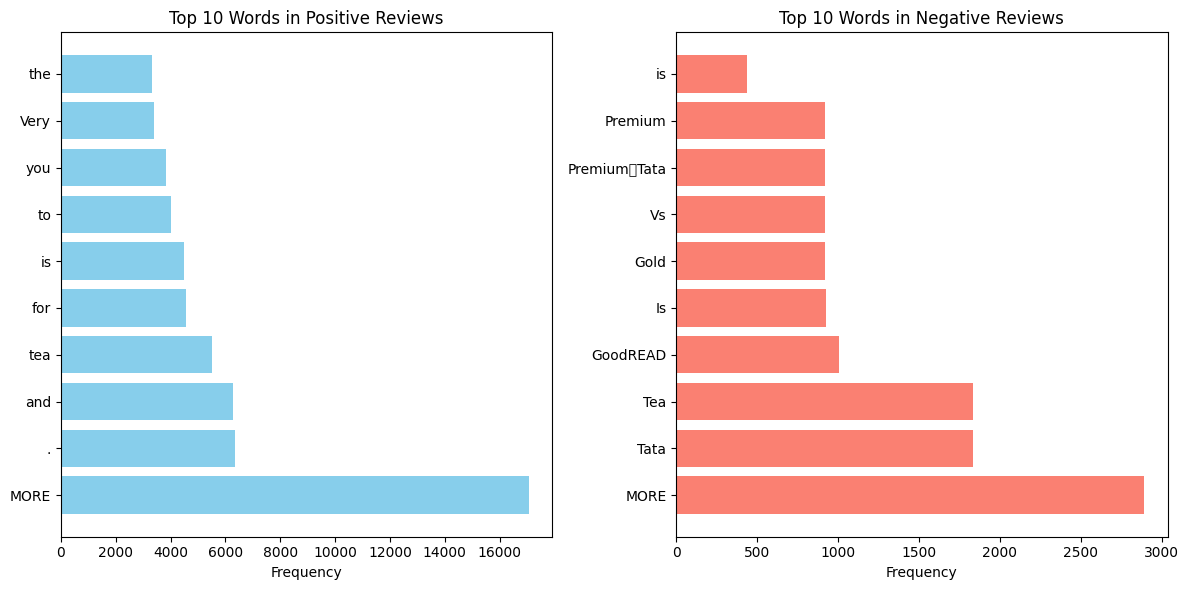

In [65]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(list(dict(positive_word_freq.most_common(10)).keys()), list(dict(positive_word_freq.most_common(10)).values()), color='skyblue')
plt.title('Top 10 Words in Positive Reviews')
plt.xlabel('Frequency')

plt.subplot(1, 2, 2)
plt.barh(list(dict(negative_word_freq.most_common(10)).keys()), list(dict(negative_word_freq.most_common(10)).values()), color='salmon')
plt.title('Top 10 Words in Negative Reviews')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

In [66]:
all_reviews_text = ' '.join(df['review_text'])

In [67]:
df = df.dropna()

In [68]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    cleaned_text = ' '.join(tokens)
    return cleaned_text



In [69]:
df['cleaned_review_text'] = df['review_text'].apply(clean_text)

<ipython-input-69-72a05d492f15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_review_text'] = df['review_text'].apply(clean_text)


In [70]:
df

,reviewer_name,review_title,place_of_review,up_votes,down_votes,review_text,ratings,cleaned_review_text
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,"Nice product, good quality, but price is now r...",4.0,nice product good quality price rising bad sig...
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,They didn't supplied Yonex Mavis 350. Outside ...,1.0,didnt supplied yonex mavis 350 outside cover y...
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Worst product. Damaged shuttlecocks packed in ...,1.0,worst product damaged shuttlecock packed new b...
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,"Quite O. K. , but nowadays the quality of the...",3.0,quite k nowadays quality cork like 3 5 year ba...
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Good quality product. Delivered on time.READ MORE,5.0,good quality product delivered timeread
...,...,...,...,...,...,...,...,...
20214,Omm Prakash,Simply awesome,"Certified Buyer, Dhamanagar",26.0,5.0,Nice for red tea.Valeu for moneyREAD MORE,5.0,nice red teavaleu moneyread
20215,Ritu Raj,Good choice,"Certified Buyer, Katihar District",19.0,4.0,niceREAD MORE,4.0,niceread
20216,Arun Saini,Terrible product,"Certified Buyer, Haridwar",13.0,2.0,Tata Gold Vs Tata Tea Premium👍Tata Tea Premiu...,1.0,tata gold v tata tea premiumtata tea premium g...
20217,Amitabh Shahi,Just wow!,"Certified Buyer, Darbhanga",32.0,10.0,I believe that it's the best packaged tea in t...,5.0,believe best packaged tea market taste somethi...


In [71]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch

In [72]:
# Bag-of-Words (BoW)
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(df['cleaned_review_text'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_review_text'])

In [73]:
tokenized_text = df['cleaned_review_text'].apply(word_tokenize)

w2v_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)
w2v_model.build_vocab(tokenized_text)
w2v_model.train(tokenized_text, total_examples=w2v_model.corpus_count, epochs=10)



(643173, 1358330)

In [74]:
df['sentiment'] = df['ratings'].apply(lambda x: 'Positive' if x > 3 else 'Negative')

<ipython-input-74-a36b94966853>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['ratings'].apply(lambda x: 'Positive' if x > 3 else 'Negative')


In [75]:
df

,reviewer_name,review_title,place_of_review,up_votes,down_votes,review_text,ratings,cleaned_review_text,sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,"Nice product, good quality, but price is now r...",4.0,nice product good quality price rising bad sig...,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,They didn't supplied Yonex Mavis 350. Outside ...,1.0,didnt supplied yonex mavis 350 outside cover y...,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Worst product. Damaged shuttlecocks packed in ...,1.0,worst product damaged shuttlecock packed new b...,Negative
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,"Quite O. K. , but nowadays the quality of the...",3.0,quite k nowadays quality cork like 3 5 year ba...,Negative
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Good quality product. Delivered on time.READ MORE,5.0,good quality product delivered timeread,Positive
...,...,...,...,...,...,...,...,...,...
20214,Omm Prakash,Simply awesome,"Certified Buyer, Dhamanagar",26.0,5.0,Nice for red tea.Valeu for moneyREAD MORE,5.0,nice red teavaleu moneyread,Positive
20215,Ritu Raj,Good choice,"Certified Buyer, Katihar District",19.0,4.0,niceREAD MORE,4.0,niceread,Positive
20216,Arun Saini,Terrible product,"Certified Buyer, Haridwar",13.0,2.0,Tata Gold Vs Tata Tea Premium👍Tata Tea Premiu...,1.0,tata gold v tata tea premiumtata tea premium g...,Negative
20217,Amitabh Shahi,Just wow!,"Certified Buyer, Darbhanga",32.0,10.0,I believe that it's the best packaged tea in t...,5.0,believe best packaged tea market taste somethi...,Positive


In [76]:
df.to_csv('/content/drive/MyDrive/irl/webs/cleaned_data.csv', index=False)